In [1]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


https://drive.google.com/file/d/1WIWPJTrEDYHlHXd4AxUceJnM6AMDtetH/view?usp=drive_link

In [2]:
! gdown 1WIWPJTrEDYHlHXd4AxUceJnM6AMDtetH

Downloading...
From: https://drive.google.com/uc?id=1WIWPJTrEDYHlHXd4AxUceJnM6AMDtetH
To: /content/data_set_russia.zip
100% 20.2k/20.2k [00:00<00:00, 54.8MB/s]


In [3]:
! unzip /content/data_set_russia.zip

Archive:  /content/data_set_russia.zip
  inflating: flats_moscow.csv        


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('/content/data_set_russia.zip', index_col=0)

In [6]:
df

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
1,81,58,40,6.0,12.5,7,1,1,1,3
2,75,44,28,6.0,13.5,7,1,0,1,6
3,128,70,42,6.0,14.5,3,1,1,1,3
4,95,61,37,6.0,13.5,7,1,0,1,1
5,330,104,60,11.0,10.5,7,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...
2036,110,77,45,10.0,12.0,5,0,0,1,5
2037,95,60,43,6.0,9.0,5,0,0,1,4
2038,95,60,46,5.0,10.5,5,1,0,1,7
2039,129,76,48,10.0,12.5,5,0,0,1,3


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df, random_state=42, train_size=0.6)

In [9]:
val, test = train_test_split(test, random_state=42, test_size=0.5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 1 to 2040
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2040 non-null   int64  
 1   totsp     2040 non-null   int64  
 2   livesp    2040 non-null   int64  
 3   kitsp     2040 non-null   float64
 4   dist      2040 non-null   float64
 5   metrdist  2040 non-null   int64  
 6   walk      2040 non-null   int64  
 7   brick     2040 non-null   int64  
 8   floor     2040 non-null   int64  
 9   code      2040 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 175.3 KB


In [11]:
df.describe()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


In [12]:
train.columns

Index(['price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'walk',
       'brick', 'floor', 'code'],
      dtype='object')

In [13]:
X = ['totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'walk',
       'brick', 'floor', 'code']
y = ['price']

In [14]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.1 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostRegressor

<Axes: >

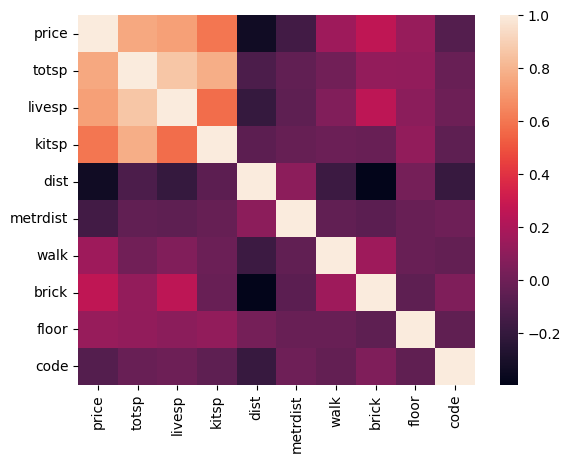

In [ ]:
sns.heatmap(df.corr())

In [16]:
y = ['price']
X = ['price', 'totsp', 'livesp', 'kitsp']

In [17]:
model = CatBoostRegressor(eval_metric = 'MAPE', verbose=100)

In [18]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.052563
0:	learn: 0.2530219	test: 0.2523863	best: 0.2523863 (0)	total: 49.8ms	remaining: 49.7s
100:	learn: 0.0144407	test: 0.0176371	best: 0.0176371 (100)	total: 339ms	remaining: 3.02s
200:	learn: 0.0090410	test: 0.0117109	best: 0.0117109 (200)	total: 664ms	remaining: 2.64s
300:	learn: 0.0053687	test: 0.0082690	best: 0.0082686 (299)	total: 922ms	remaining: 2.14s
400:	learn: 0.0038774	test: 0.0069614	best: 0.0069614 (400)	total: 1.07s	remaining: 1.6s
500:	learn: 0.0031345	test: 0.0062984	best: 0.0062984 (500)	total: 1.41s	remaining: 1.41s
600:	learn: 0.0026024	test: 0.0058454	best: 0.0058454 (600)	total: 1.66s	remaining: 1.1s
700:	learn: 0.0022766	test: 0.0055832	best: 0.0055832 (700)	total: 1.86s	remaining: 794ms
800:	learn: 0.0020640	test: 0.0054508	best: 0.0054508 (800)	total: 2.04s	remaining: 506ms
900:	learn: 0.0018629	test: 0.0053146	best: 0.0053146 (900)	total: 2.21s	remaining: 243ms
999:	learn: 0.0016650	test: 0.0051564	best: 0.0051564 (999)	total: 2.45s	re

In [19]:
model.predict(test[X])

array([104.71688291, 167.93368954, 144.77963037, 113.77090694,
        92.86376087, 178.1230277 , 126.76707805, 117.97182048,
        84.33197204,  79.93415679,  76.94259207, 127.90470634,
       298.43279034,  84.94234861, 113.07196338, 161.76799734,
        77.73351028, 138.17298856,  94.66830104, 166.42348071,
       120.06578627, 148.43216758, 111.92052135, 152.84064113,
       137.78098002, 161.96612395, 127.60595558, 149.56391226,
        95.23265418, 135.30352341,  96.7939981 , 138.15308839,
        79.10646505,  98.53894046, 124.87865245, 128.16553011,
        85.05302094, 115.8458999 , 179.78290133, 135.15602124,
       143.00974164, 230.95838007, 129.79999658, 144.18486163,
        82.09141753, 130.14459121,  95.25006798,  85.08460027,
       113.84414137, 104.89312555, 170.69387831, 365.30050643,
       140.02232086,  92.79628578, 128.19132201, 260.57930663,
        89.98183351, 111.69398025, 108.02398828,  90.16292317,
       135.15335148, 178.33677532, 135.04225873, 108.14

In [20]:
test['price_pred'] = model.predict(test[X])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [22]:
def error(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred)),
  print(mean_absolute_percentage_error(y_true, y_pred))

In [23]:
error(test['price'], test['price_pred'])

0.46166048976879903
0.0028352537868604837


<Axes: >

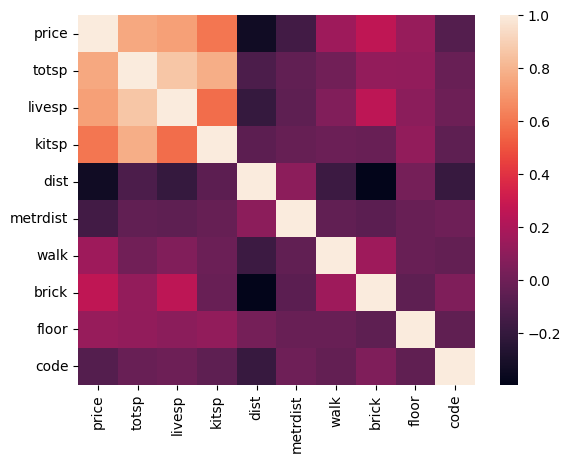

In [24]:
sns.heatmap(df.corr())

In [26]:
train.columns

Index(['price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'walk',
       'brick', 'floor', 'code'],
      dtype='object')

In [25]:
X = ['totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'walk',
    'brick', 'floor', 'code']


In [27]:
model2 = CatBoostRegressor(eval_metric = 'MAPE', verbose=100)

In [28]:
model2.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.052563
0:	learn: 0.2590181	test: 0.2586356	best: 0.2586356 (0)	total: 702us	remaining: 702ms
100:	learn: 0.0993760	test: 0.1185983	best: 0.1185983 (100)	total: 54.9ms	remaining: 488ms
200:	learn: 0.0854140	test: 0.1118759	best: 0.1118759 (200)	total: 107ms	remaining: 426ms
300:	learn: 0.0777598	test: 0.1092836	best: 0.1092836 (300)	total: 158ms	remaining: 367ms
400:	learn: 0.0715003	test: 0.1079232	best: 0.1079146 (399)	total: 212ms	remaining: 316ms
500:	learn: 0.0661557	test: 0.1070079	best: 0.1069992 (499)	total: 271ms	remaining: 270ms
600:	learn: 0.0616173	test: 0.1064262	best: 0.1064163 (597)	total: 323ms	remaining: 215ms
700:	learn: 0.0575721	test: 0.1058203	best: 0.1058064 (692)	total: 374ms	remaining: 160ms
800:	learn: 0.0541225	test: 0.1060260	best: 0.1057340 (760)	total: 429ms	remaining: 107ms
900:	learn: 0.0513065	test: 0.1063648	best: 0.1057340 (760)	total: 484ms	remaining: 53.1ms
999:	learn: 0.0486972	test: 0.1065720	best: 0.1057340 (760)	total: 535ms

In [31]:
test['price_pred_3'] = model2.predict(test[X])

In [32]:
error(test['price'], test['price_pred_3'])

12.373200264336768
0.08924001226294057


In [33]:
error(test['price'], test['price_pred'])

0.46166048976879903
0.0028352537868604837
